In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/src")
from data.lagrangian_datatools import *
import data.statistics as ds
import importlib
from torchvision import transforms

In [2]:
importlib.reload(ds)

<module 'data.statistics' from '/home/maria/Documents/github/multiscale-turbulence/src/data/statistics.py'>

# Normalizing and scaling

**Using Z-score**

In [17]:
# Loading the data
filename = "../data/velocities.npy"
N = 10000

In [24]:
# tau goes from 1 to 1000
list_taus = np.unique([int(t) for t in np.logspace(0, 3)]).astype(int)
list_n=[2,4,6]

In [6]:
transformed_data = ParticleDataset(npy_filename=filename, 
root_dir=".",
transform=transforms.Compose([StandardScaler(mean=-0.0003, std=1.7358), 
ToTensor()]))

In [7]:
std, mean = torch.std_mean(transformed_data[:N])
print(std, mean)

tensor(1.0085) tensor(0.0243)


In [8]:
transformed_data[0]

tensor([[ 0.5706, -0.6493,  0.2988],
        [ 0.5226, -0.6632,  0.2952],
        [ 0.4743, -0.6743,  0.2868],
        ...,
        [ 1.5744, -0.1698,  0.6210],
        [ 1.5646, -0.1393,  0.6340],
        [ 1.5584, -0.1021,  0.6420]])

Text(0.5, 0, 't')

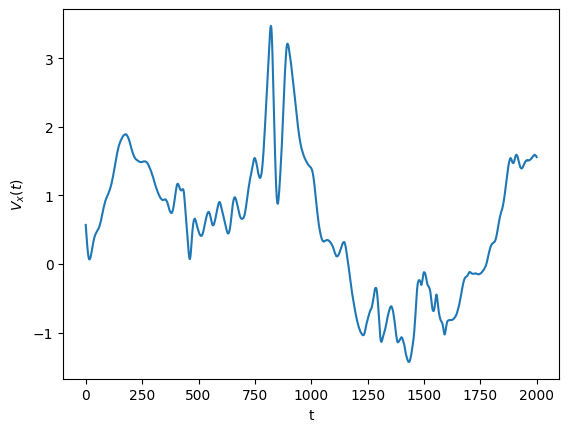

In [9]:
plt.plot(np.arange(2000), transformed_data[0].numpy()[:,0])
plt.ylabel(r"$V_x(t)$")
plt.xlabel("t")

Mean and standard deviation per channel

In [10]:
means, stds = torch.std_mean(transformed_data[:N], dim=(0,1))
print(stds, means)

tensor([-0.0092,  0.1569, -0.0748]) tensor([0.9947, 1.0614, 0.9522])


## The statistics to be measured

In [11]:
del transformed_data
transformed_data = ParticleDataset(npy_filename=filename, root_dir=".",
                                   transform=StandardScaler(mean=-0.0003, std=1.7358))

In [12]:
stat = ds.StatisticalPhysics(transformed_data[:N])

### Lagrangian structures

$$
S_n(\tau) = \left \langle (\delta_{\tau}V)^n \right \rangle
$$

$\tau$ is defined as the range of integers between $10^0$ and $10^3$

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-4, top=10e3)
stat.plot_several_lagrangian_structure_function(list_n, coordinate=0, ax=ax)

## Flatness

$$
F_n(\tau) = \frac{\left \langle (\delta_{\tau}V)^n \right \rangle}{\left \langle (\delta_{\tau}V)^{n/2} \right \rangle ^2}
$$

In [ ]:
stat.plot_several_flatness_function(list_n, coordinate=0)

## PDF's

This is the pdf of the velocity at coordinate x

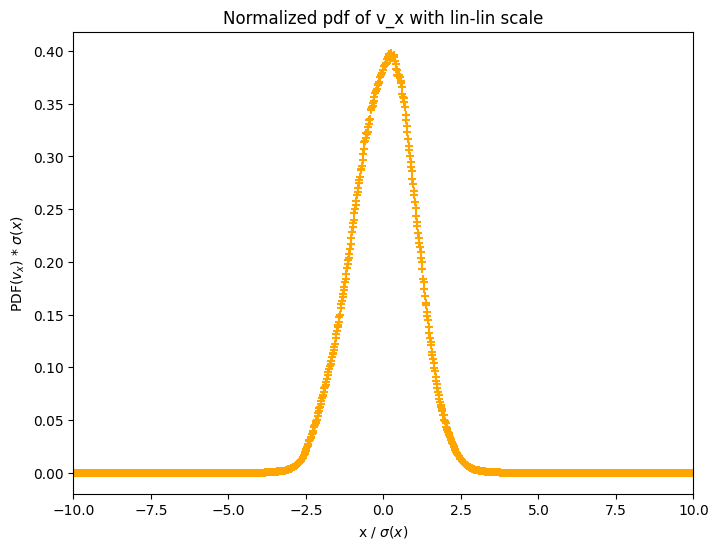

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-10, 10)
stat.plot_vx_norm_pdf(y_log=False, ax=ax)

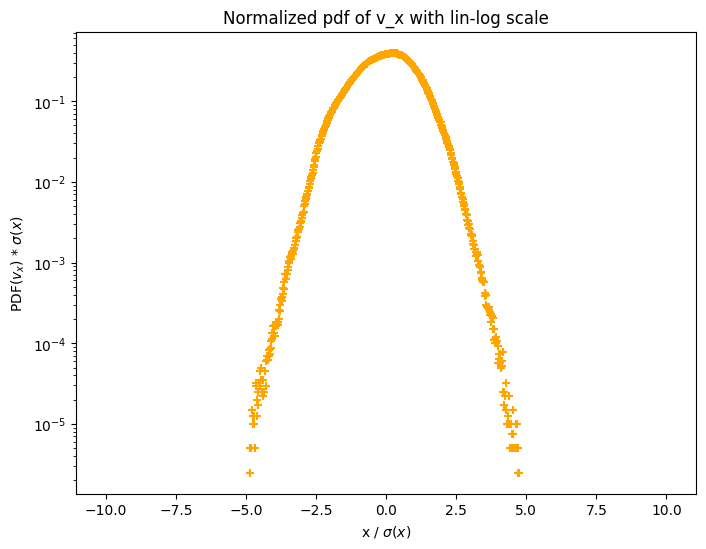

In [10]:
# In log scale
stat.plot_vx_norm_pdf(y_log=True)

Linear-log plot of the pdf of the velocity at coordinate x, for a given value of $\tau = 100$

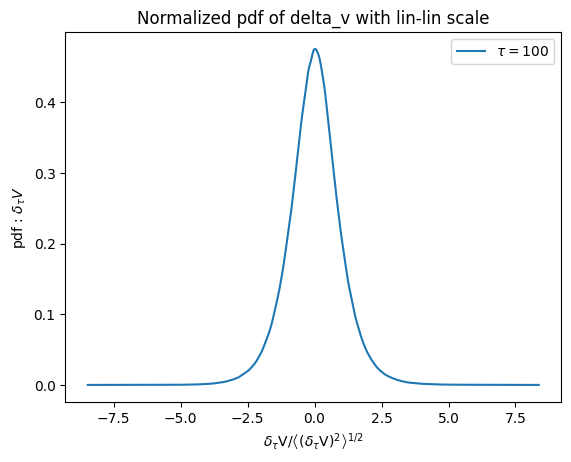

In [11]:
stat.plot_pdf_delta_tau_velocity(100, coordinate=0)

(19990000,)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


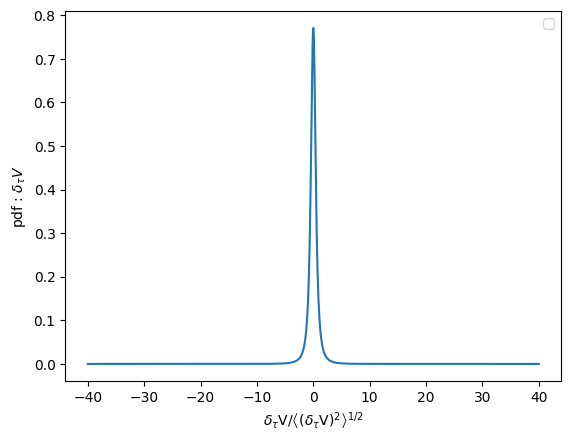

In [ ]:
# pdf when \tau =1 gets very low probabilities near the boundaries (-1,1)
stat.plot_pdf_delta_tau_velocity(1, coordinate=0)

Now we're plotting the pdf at several different values of $\tau$ (it takes some minutes...)

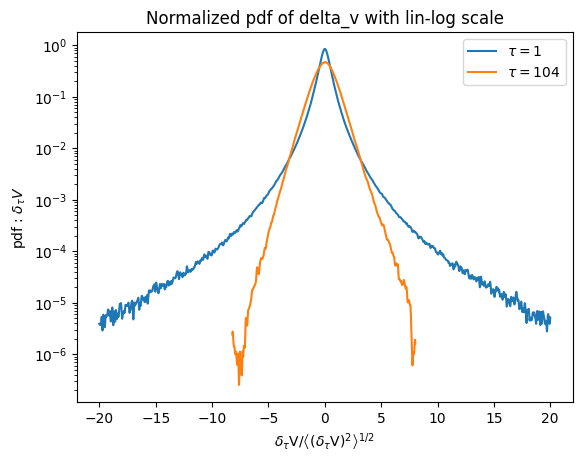

: 

In [ ]:
stat.plot_several_tau_delta_velocity(list_taus[::25], coordinate=0, clip=(-20,20), y_log=True)

This is the pdf of the acceleration at coordinate x, of all the dataset

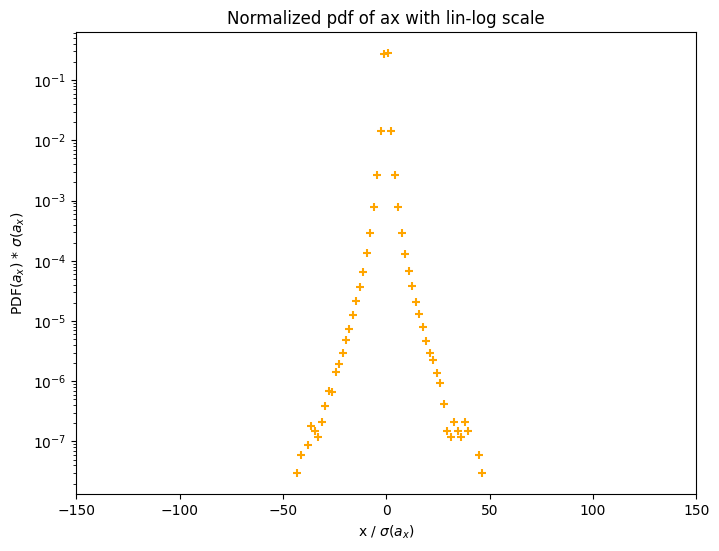

In [12]:
stat.plot_ax_norm_pdf()

## Min-Max scaling


In [13]:
# Loading the data
filename = "../data/subsampled_velocities.npy"
N = 10000

# These are the min and max values per each coordinate
# they were obtained by running the normalization script inside data/
min_bychan = np.array([-9.97037474, -8.63455392, -8.3230226 ])
max_bychan = np.array([ 9.78241835, 10.2621928,   9.73699859])

In [14]:
transformed_data = ParticleDataset(npy_filename=filename, 
root_dir=".",
transform=transforms.Compose([ MinMaxScaler(min= min_bychan, max=max_bychan), ToTensor()]))

In [15]:
std, mean = torch.std_mean(transformed_data[:N])
print(std, mean)

tensor(0.1870) tensor(-0.0446)


In [21]:
plt.plot(np.arange(2000), transformed_data[0].numpy()[:,0])
plt.ylabel(r"$V_x(t)$")
plt.xlabel("t")
plt.title("Trajectory scaled")

Text(0.5, 1.0, 'Trajectory scaled')

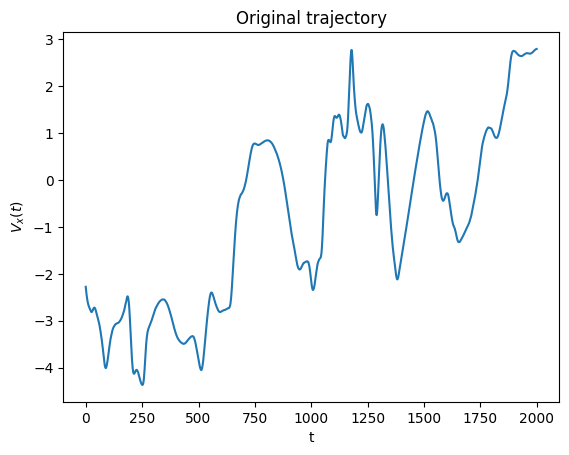

In [20]:
filename = "../data/subsampled_velocities.npy"
orig_data = ParticleDataset(npy_filename=filename, root_dir=".")
plt.plot(np.arange(2000), orig_data[0][:,0])
plt.ylabel(r"$V_x(t)$")
plt.xlabel("t")
plt.title("Original trajectory")
del orig_data

In [22]:
del transformed_data
transformed_data = ParticleDataset(npy_filename=filename, root_dir=".",
                                   transform=MinMaxScaler(min= min_bychan, max=max_bychan))
stat = ds.StatisticalPhysics(transformed_data[:N])

### Lagrangian structures

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_ylim(bottom=10e-4, top=10e3)
stat.plot_several_lagrangian_structure_function(list_n, coordinate=0, ax=ax)

Plotting agains the original data. Note: the curves that correspond to the original data are marked with transversal lines. 

In [26]:
# plot against the original data
filename = "../data/subsampled_velocities.npy"
orig_data = ParticleDataset(npy_filename=filename, root_dir=".")
orig_stat = ds.StatisticalPhysics(orig_data[:N]) # comparing with the same number of points

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel(r"$S_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

# create a list of colors for each n
colors = ["blue", "green", "orange"]
for i,n in enumerate(list_n):
    tau, sn_tau = stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, sn_tau = orig_stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

### Flatness

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_ylim(bottom=10e-2, top=10e4)
ax.set_ylabel(r"$F_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

for i,n in enumerate(list_n):
    tau, fn_tau = stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, fn_tau = orig_stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

### PDF's

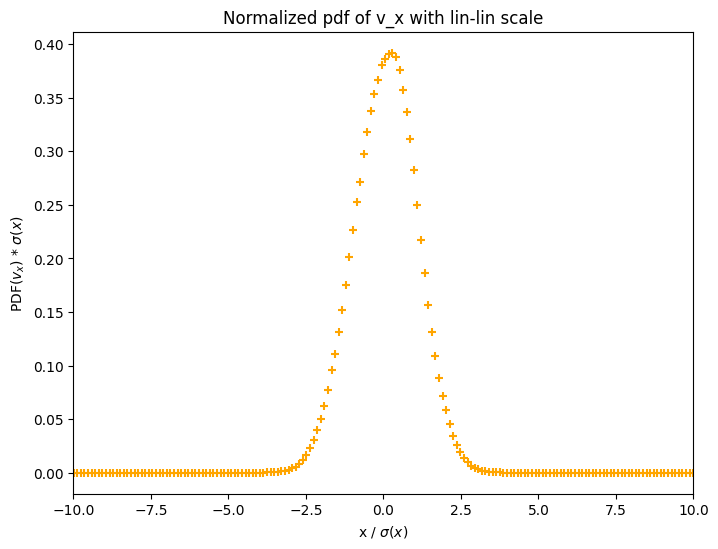

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-10, 10)
stat.plot_vx_norm_pdf(y_log=False, ax=ax)

In [21]:
stat.plot_several_tau_delta_velocity(list_taus[::25], coordinate=0, clip=(-20,20), y_log=True)

In [30]:
# Loading the data
filename = "../data/subsampled_velocities_scaled.npy"
N = 10000

In [31]:
transformed_data = ParticleDataset(npy_filename=filename, 
root_dir=".",
transform=transforms.Compose([ ToTensor()]))

In [32]:
std, mean = torch.std_mean(transformed_data[:N])
print(std, mean)

tensor(0.1870) tensor(-0.0446)


Text(0.5, 1.0, 'Trajectory scaled')

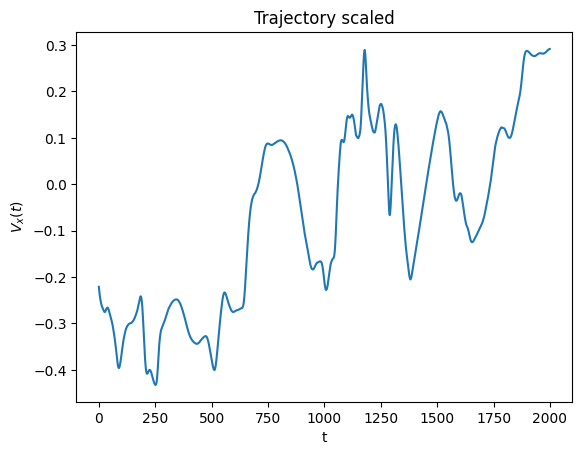

In [33]:
plt.plot(np.arange(2000), transformed_data[0].numpy()[:,0])
plt.ylabel(r"$V_x(t)$")
plt.xlabel("t")
plt.title("Trajectory scaled")

In [37]:
del transformed_data
transformed_data = ParticleDataset(npy_filename=filename, root_dir=".",)
stat = ds.StatisticalPhysics(transformed_data[:N])

### Lagrangian structures

Plotting agains the original data. Note: the curves that correspond to the original data are marked with transversal lines. 

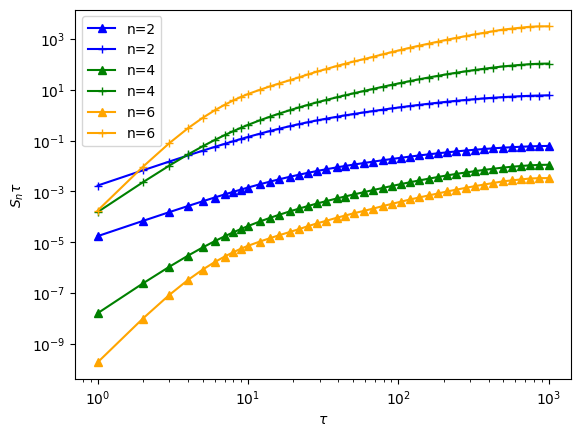

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel(r"$S_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

# create a list of colors for each n
colors = ["blue", "green", "orange"]
for i,n in enumerate(list_n):
    tau, sn_tau = stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, sn_tau = orig_stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

### Flatness

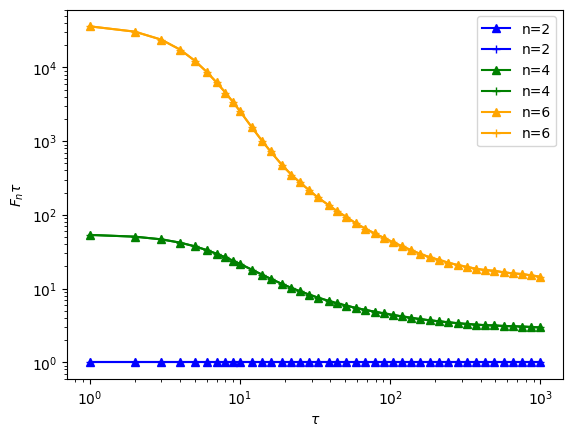

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_ylim(bottom=10e-2, top=10e4)
ax.set_ylabel(r"$F_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

for i,n in enumerate(list_n):
    tau, fn_tau = stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, fn_tau = orig_stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

### PDF's

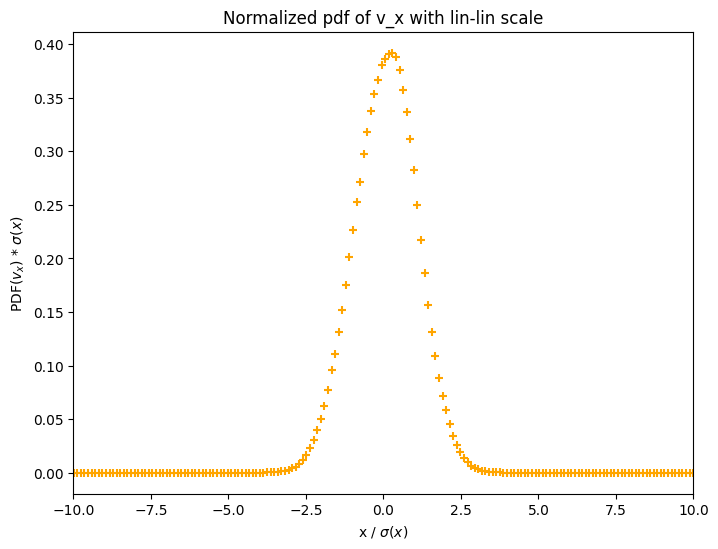

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-10, 10)
stat.plot_vx_norm_pdf(y_log=False, ax=ax)